In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
%matplotlib inline

In [2]:
data = pd.read_csv("updatedDatasets/Update3.csv")

In [3]:
data.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,YearsCodedJob,DeveloperType,...,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Gender,HighestEducationParents,Salary,ExpectedSalary,Assess_Scoring
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,NaN,iOS,iOS,Atom; Xcode,Turn on some music,Male,High school,NaN,NaN,30.5
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,...,MySQL; SQLite,Amazon Web Services (AWS),Linux Desktop; Raspberry Pi; Amazon Web Servic...,Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...,"Put on some ambient sounds (e.g. whale songs, ...",Male,A master's degree,NaN,37500.0,NaN


#  [IDE] Segregation, Cleaning and Analysis

In [4]:
dataT = data[data['IDE'].notna()]

In [5]:
A = {}
J = list()
for i in dataT['IDE']:
    x = i
    J = str(x).split('; ')
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [6]:
A

{'Atom': 6540,
 'Xcode': 3850,
 'Notepad++': 12681,
 'Vim': 9679,
 'PyCharm': 3268,
 'RubyMine': 613,
 'Visual Studio': 13677,
 'Visual Studio Code': 6826,
 'Sublime Text': 9978,
 'IntelliJ': 7418,
 'TextMate': 439,
 'IPython / Jupyter': 1914,
 'NetBeans': 2909,
 'Emacs': 1956,
 'Coda': 227,
 'PHPStorm': 2965,
 'Android Studio': 5953,
 'RStudio': 996,
 'Komodo': 254,
 'Eclipse': 7899,
 'Light Table': 70,
 'Zend': 156}

In [7]:
D1 = pd.DataFrame.from_dict(A,orient='index')

In [8]:
D1=D1.reset_index(level=0)

In [9]:
D1.columns=['IDE','Users']

In [10]:
D1 = D1.sort_values(by='Users',ascending=False)

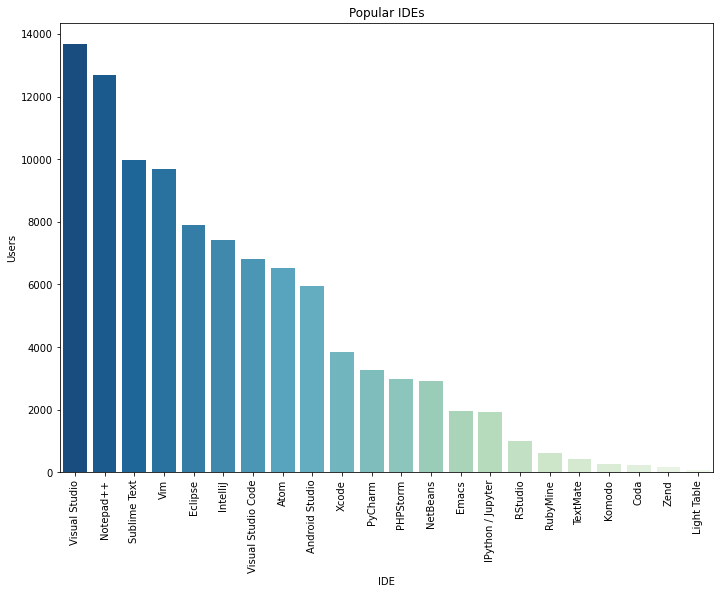

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D1,x='IDE',y='Users',order=D1['IDE'],palette='GnBu_r')
plt.title('Popular IDEs')
plt.xticks(rotation=90)
plt.show()

Thus, we see that Visual Studio, Notepad++ and Sublime Text are amongst the top IDE tools preferred by the developers.

Visual Studio features a lightning fast source code editor, perfect for day-to-day use. Visual Studio includes built-in support for IntelliSense code completion, rich semantic code understanding and navigation, and code refactoring.

# [HaveWorkedLanguage] Segregation, Cleaning and Analysis

In [12]:
dataT = data[data['HaveWorkedLanguage'].notna()]

In [13]:
dataT['HaveWorkedLanguage'].nunique()

8438

In [14]:
A = {}
J = list()
for i in dataT['HaveWorkedLanguage']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [15]:
A

{'Swift': 2368,
 'JavaScript': 22875,
 'Python': 11704,
 'Ruby': 3324,
 'SQL': 18754,
 'Java': 14524,
 'PHP': 10290,
 'Matlab': 1569,
 'R': 1634,
 'Rust': 416,
 'CoffeeScript': 1192,
 'Clojure': 391,
 'Elixir': 380,
 'Erlang': 281,
 'Haskell': 649,
 'C#': 12476,
 'Objective-C': 2349,
 'C': 6974,
 'C++': 8155,
 'Assembly': 1823,
 'VB.NET': 2273,
 'Perl': 1585,
 'Scala': 1309,
 'F#': 457,
 'TypeScript': 3488,
 'Lua': 1039,
 'VBA': 1574,
 'Groovy': 1193,
 'Go': 1557,
 'Smalltalk': 327,
 'Visual Basic 6': 1071,
 'Common Lisp': 273,
 'Dart': 145,
 'Julia': 138,
 'Hack': 107}

In [16]:
D2 = pd.DataFrame.from_dict(A,orient='index',columns=['Users'],)
D2=D2.reset_index()
D2.columns=['Language','Users']
D2

,Language,Users
0,Swift,2368
1,JavaScript,22875
2,Python,11704
3,Ruby,3324
4,SQL,18754
5,Java,14524
6,PHP,10290
7,Matlab,1569
8,R,1634
9,Rust,416


In [17]:
D2 = D2.sort_values(by='Users',ascending=False)

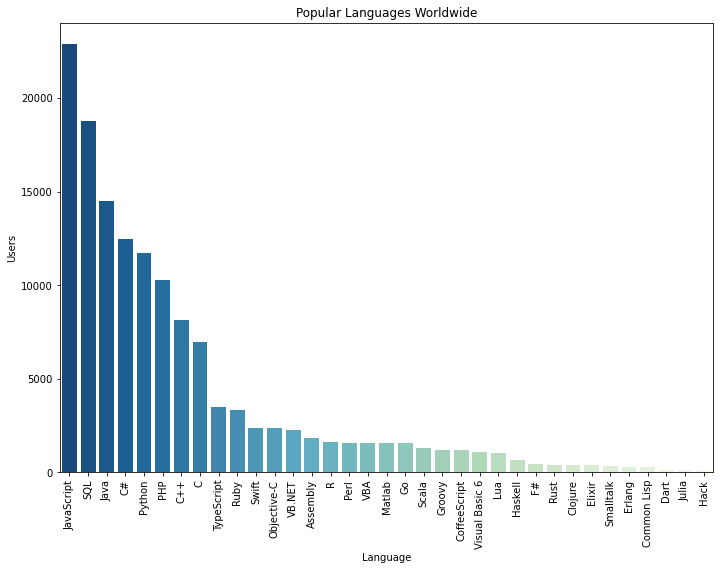

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D2,x='Language',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)
plt.title('Popular Languages Worldwide')
plt.show()

Thus we see Javascript is the most commonly used language amongst the developers

# Language Having Higher Salary

In [19]:
D=dict()
J=list()
for i in range(data.shape[0]):
    x=data.iloc[i]['HaveWorkedLanguage']
    J=str(x).split('; ')
    if pd.isna(data.iloc[i]['Salary']):
            continue
    for v in J:
        if v not in D:
            D[v]=[1,data.iloc[i]['Salary']]
        else:
            D[v][0]=D[v][0]+1
            D[v][1]=D[v][1]+data.iloc[i]['Salary']
        J.clear()

In [20]:
D

{'Java': [5063, 274961836.30963445],
 'Matlab': [106, 4894303.809797043],
 'nan': [10173, 520997425.55657226],
 'CoffeeScript': [649, 38478195.474818],
 'C#': [7901, 470683636.4026364],
 'Objective-C': [292, 15017230.281759894],
 'R': [130, 6831123.69093387],
 'C': [4010, 231265483.76123568],
 'Assembly': [1169, 65964828.717954345],
 'JavaScript': [5105, 273749983.653353],
 'Perl': [121, 8197748.992534114],
 'PHP': [436, 20835695.99036916],
 'C++': [2734, 159697470.69425428],
 'Go': [516, 33450677.3442025],
 'Elixir': [144, 7951944.961607413],
 'Python': [752, 40922176.701971054],
 'Ruby': [138, 7766612.690607032],
 'SQL': [266, 16751392.811141621],
 'Common Lisp': [39, 2682125.488112227],
 'Groovy': [583, 36732754.60800676],
 'Scala': [46, 3384811.4687506547],
 'Erlang': [46, 2637604.625225814],
 'Swift': [51, 2608429.579502683],
 'Clojure': [161, 11288201.28447709],
 'Rust': [4, 294774.9121448517],
 'Haskell': [81, 4305808.627949886],
 'Dart': [34, 1819020.1286171395],
 'Lua': [20, 1

In [21]:
D.pop('nan')

[10173, 520997425.55657226]

In [22]:
temp = pd.DataFrame(D).transpose()
temp.columns = ['Count','TotalSalary']
temp.head()

,Count,TotalSalary
Java,5063.0,2.749618e+08
Matlab,106.0,4.894304e+06
CoffeeScript,649.0,3.847820e+07
C#,7901.0,4.706836e+08
Objective-C,292.0,1.501723e+07


In [23]:
temp['AvgSalary']=temp['TotalSalary']/temp['Count']
temp.drop('TotalSalary',axis=1,inplace=True)
temp.head()

,Count,AvgSalary
Java,5063.0,54308.085386
Matlab,106.0,46172.677451
CoffeeScript,649.0,59288.436787
C#,7901.0,59572.666296
Objective-C,292.0,51428.870828


In [24]:
temp.reset_index(inplace=True)
temp.sort_values('AvgSalary',ascending=False,ignore_index=True).head()


,index,Count,AvgSalary
0,Smalltalk,62.0,87855.410630
1,TypeScript,7.0,74606.885120
2,Rust,4.0,73693.728036
3,Scala,46.0,73582.858016
4,F#,23.0,70469.940540


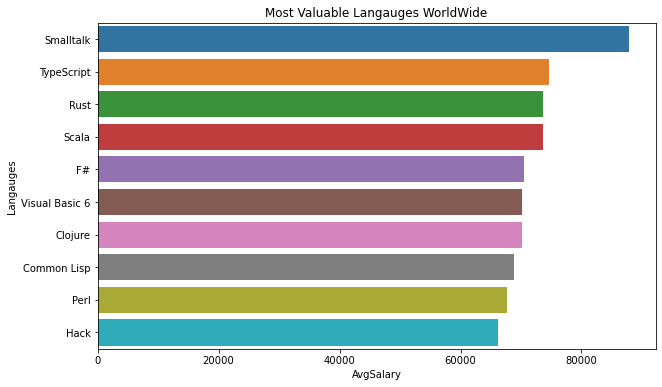

In [25]:
plt.figure(figsize=(10,6))
s.barplot(y='index',x='AvgSalary',data=temp.sort_values('AvgSalary',ascending=False).head(10))
plt.title('Most Valuable Langauges WorldWide')
plt.ylabel('Langauges')
plt.show()

Hence, We see that SmallTalk is the most widely popular language here. This is because SmallTalk is the first language that used OOP.  The highly productive environment provided by Smalltalk platforms made them ideal for rapid, iterative development.

TypeScript is a modern programming language loved by developers for making web development a lot easier

# Popular Langauges in INDIA

In [26]:
df_india = pd.read_csv('updatedDatasets/UpdatedIndia.csv')

In [27]:
A = {}
J = list()
for i in dataT['HaveWorkedLanguage']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [28]:

D2 = pd.Series(A, name = 'Languages Already Worked')
D2 = D2.to_frame()
D2 = D2.reset_index(level=0)
D2.columns=['Language','Users']
D2 = D2.sort_values(by='Users',ascending=False)
D2.head()

,Language,Users
1,JavaScript,22875
4,SQL,18754
5,Java,14524
15,C#,12476
2,Python,11704


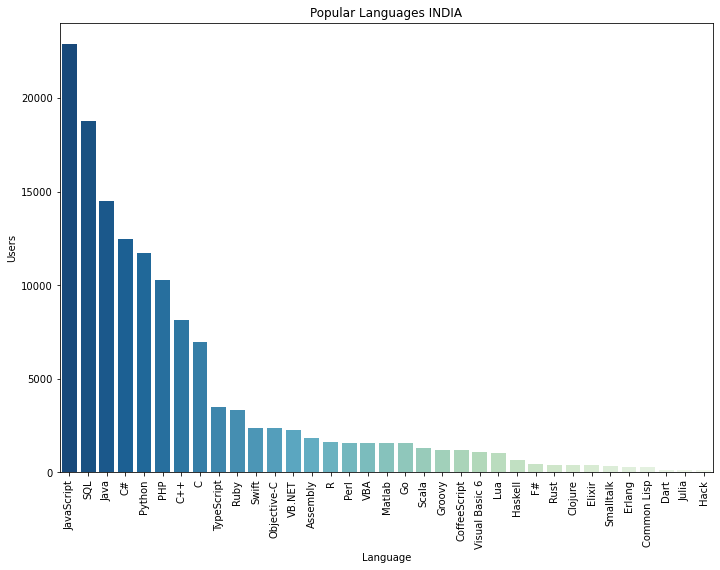

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D2,x='Language',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)
plt.title('Popular Languages INDIA')
plt.show()

Hence, JavaScript is the most popular Language in India.

# [WantWorkLanguage] Segregation,Cleaning and Analysis

In [30]:
dataT = data[data['WantWorkLanguage'].notna()]

In [31]:
A = {}
J = list()
for i in dataT['WantWorkLanguage']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [32]:
A

{'Swift': 4530,
 'Java': 9988,
 'Python': 12570,
 'Ruby': 3966,
 'SQL': 11217,
 'C': 4841,
 'Rust': 2718,
 'Matlab': 931,
 'R': 2628,
 'Clojure': 1308,
 'Elixir': 1565,
 'Erlang': 1053,
 'Haskell': 2306,
 'TypeScript': 5692,
 'JavaScript': 16327,
 'Julia': 515,
 'Scala': 3122,
 'F#': 2034,
 'Go': 5770,
 'C#': 10187,
 'Objective-C': 1844,
 'Assembly': 1923,
 'C++': 7647,
 'VB.NET': 804,
 'Perl': 1089,
 'Hack': 338,
 'PHP': 5365,
 'Lua': 1117,
 'Groovy': 866,
 'CoffeeScript': 1032,
 'Common Lisp': 647,
 'Dart': 496,
 'Smalltalk': 421,
 'VBA': 445,
 'Visual Basic 6': 295}

In [33]:
D3 = pd.DataFrame.from_dict(A,orient='index')
D3

,0
Swift,4530
Java,9988
Python,12570
Ruby,3966
SQL,11217
C,4841
Rust,2718
Matlab,931
R,2628
Clojure,1308


In [34]:
D3 = D3.reset_index(level=0)

In [35]:
D3.columns=['Want Language','Users']

In [36]:
D3= D3.sort_values(by='Users',ascending=False)

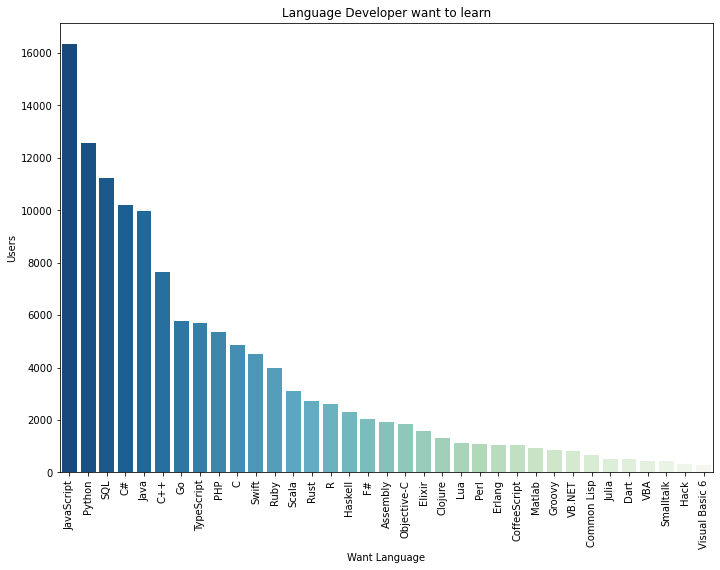

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D3,x='Want Language',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)
plt.title('Language Developer want to learn')
plt.show()

Most of the developers aspire to learn Javascript.

# [WorkedDatabase] Segregation,Cleaning and Analysis

In [38]:
dataT = data[data['HaveWorkedDatabase'].notna()]

In [39]:
A = {}
J = list()
for i in dataT['HaveWorkedDatabase']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [40]:
A

{'MySQL': 16375,
 'SQLite': 7838,
 'MongoDB': 6192,
 'Redis': 4143,
 'SQL Server': 11358,
 'PostgreSQL': 7815,
 'Oracle': 4874,
 'Cassandra': 906}

In [41]:
D4= pd.DataFrame.from_dict(A,orient='index')
D4

,0
MySQL,16375
SQLite,7838
MongoDB,6192
Redis,4143
SQL Server,11358
PostgreSQL,7815
Oracle,4874
Cassandra,906


In [42]:
D4 =D4.reset_index(level=0)

In [43]:
D4.columns=['Database Worked','Users']

Text(0.5, 1.0, 'Famous Databases')

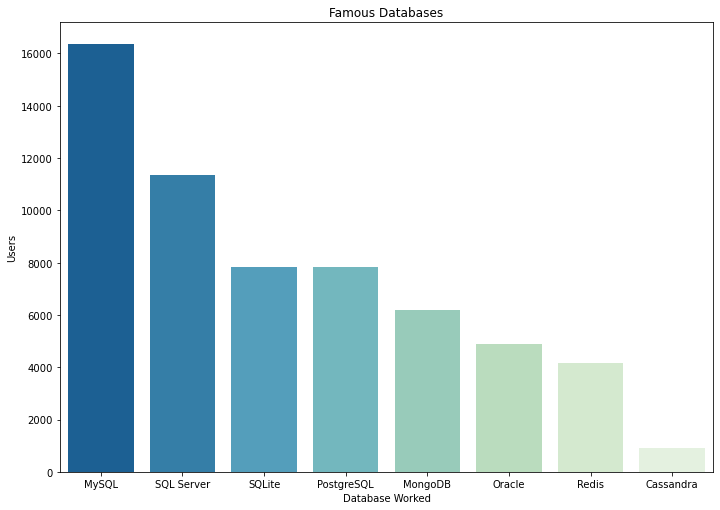

In [44]:
D4 = D4.sort_values(by='Users',ascending=False)
fig,ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D4,x='Database Worked',y ='Users',palette='GnBu_r')
plt.title('Famous Databases')

This, we see SQL and SQL Server are amongst the most indemand Database Languages

# Database Having Higher Salary

In [45]:
D=dict()
J=list()
for i in range(data.shape[0]):
    x=data.iloc[i]['HaveWorkedDatabase']
    J=str(x).split('; ')
    if pd.isna(data.iloc[i]['Salary']):
            continue
    for v in J:
        if v not in D:
            D[v]=[1,data.iloc[i]['Salary']]
        else:
            D[v][0]=D[v][0]+1
            D[v][1]=D[v][1]+data.iloc[i]['Salary']
        J.clear()

In [46]:
D

{'MySQL': [6040, 311349423.8993984],
 'MongoDB': [5148, 279031289.0886829],
 'nan': [15386, 832266017.2082916],
 'SQLite': [830, 45219650.242571615],
 'Redis': [2231, 137761128.43432027],
 'SQL Server': [7980, 469649414.1826839],
 'PostgreSQL': [1613, 95362888.05643351],
 'Cassandra': [842, 55686333.52924009],
 'Oracle': [878, 51694196.47898767]}

In [47]:
D.pop('nan')

[15386, 832266017.2082916]

In [48]:
D = pd.DataFrame(D).transpose()

In [49]:
D.columns=['Count','Total Salary']

In [50]:
# D.pop('nan')
# temp = pd.DataFrame(D).transpose()
# temp.columns = ['Count','TotalSalary']

In [51]:
temp=D

In [52]:
temp['AvgSalary']=temp['Total Salary']/temp['Count']
temp.drop('Total Salary',axis=1,inplace=True)
temp.reset_index(inplace=True)
temp.sort_values('AvgSalary',ascending=False).head()

,index,Count,AvgSalary
6,Cassandra,842.0,66135.788039
3,Redis,2231.0,61748.600822
5,PostgreSQL,1613.0,59121.443308
7,Oracle,878.0,58877.216946
4,SQL Server,7980.0,58853.310048


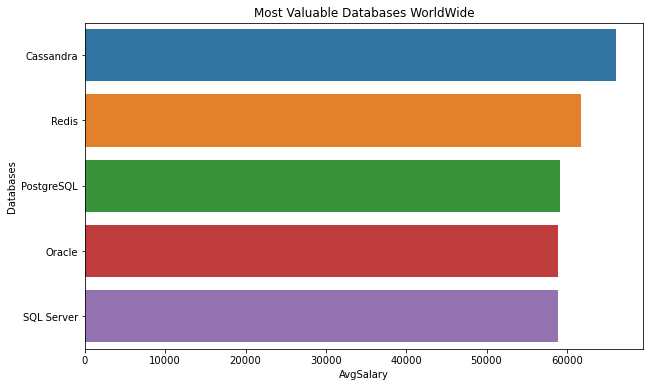

In [53]:
plt.figure(figsize=(10,6))
s.barplot(y='index',x='AvgSalary',data=temp.sort_values('AvgSalary',ascending=False).head())
plt.title('Most Valuable Databases WorldWide')
plt.ylabel('Databases')
plt.show()

Cassandra is an incredibly popular database that underpins heavy-load applications. Apart from being a backbone for Facebook and Netflix, Cassandra is a very scalable and resilient database that is easy to master and simple to configure, providing neat solutions for quite complex problems.

# [WantDatabase] Segregation,Cleaning,Analysis

In [54]:
dataT = data[data['WantWorkDatabase'].notna()]

In [55]:
A = {}
J = list()
for i in dataT['WantWorkDatabase']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [56]:
D5 = pd.DataFrame.from_dict(A,orient='index')
D5

,0
MySQL,9877
SQLite,5798
MongoDB,9823
Redis,6181
SQL Server,7353
PostgreSQL,8121
Cassandra,3151
Oracle,3034


In [57]:
D5 =D5.reset_index(level=0)

In [58]:
D5.columns=['Want Database', 'Users']

In [59]:
D5 = D5.sort_values(by='Users',ascending=False)

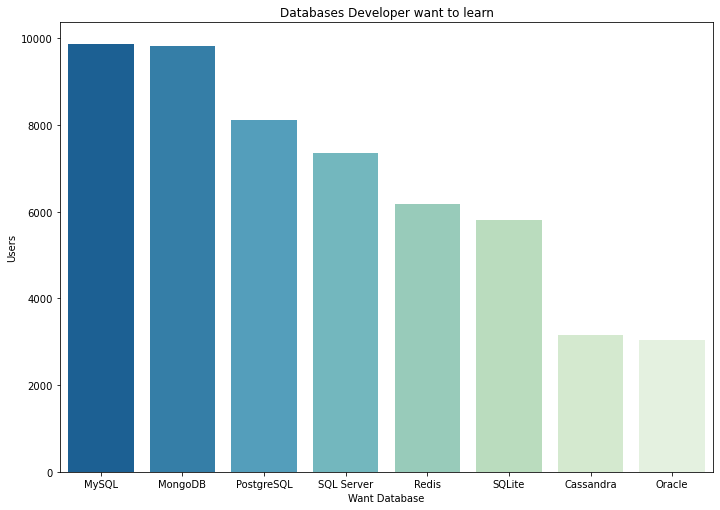

In [60]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D5,x='Want Database',y='Users',palette='GnBu_r')
plt.title('Databases Developer want to learn')
plt.show()

Hence, MongoDB and MySQL is coming up to become the most indemand database language that developers want to use

MongoDB is popular among new developers due to it's flexibility and ease of usage. Even though it's easy to use it still provides all the capabilities needed to meet the complex requirements of modern applications. A lot of developers like Mongo because it stores all of it's documents in JSON.

# [WorkedPlatform] Segregation,Cleaning,Analysis

In [61]:
dataT = data[data['HaveWorkedPlatform'].notna()]

In [62]:
A = {}
J = list()
for i in dataT['HaveWorkedPlatform']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [63]:
A

{'iOS': 4782,
 'Amazon Web Services (AWS)': 8183,
 'Windows Desktop': 11949,
 'Linux Desktop': 9593,
 'Mac OS': 5363,
 'Android': 8211,
 'Microsoft Azure': 3327,
 'Windows Phone': 1124,
 'Raspberry Pi': 4676,
 'WordPress': 4537,
 'Arduino': 2986,
 'Serverless': 606,
 'SharePoint': 1083,
 'Mainframe': 404,
 'Salesforce': 762}

In [64]:
D6 = pd.DataFrame.from_dict(A,orient='index')

In [65]:
D6

,0
iOS,4782
Amazon Web Services (AWS),8183
Windows Desktop,11949
Linux Desktop,9593
Mac OS,5363
Android,8211
Microsoft Azure,3327
Windows Phone,1124
Raspberry Pi,4676
WordPress,4537


In [66]:
D6=D6.reset_index(level=0)

In [67]:
D6.columns=['Platform Worked','Users']

In [68]:
D6=D6.sort_values(by='Users',ascending=False)

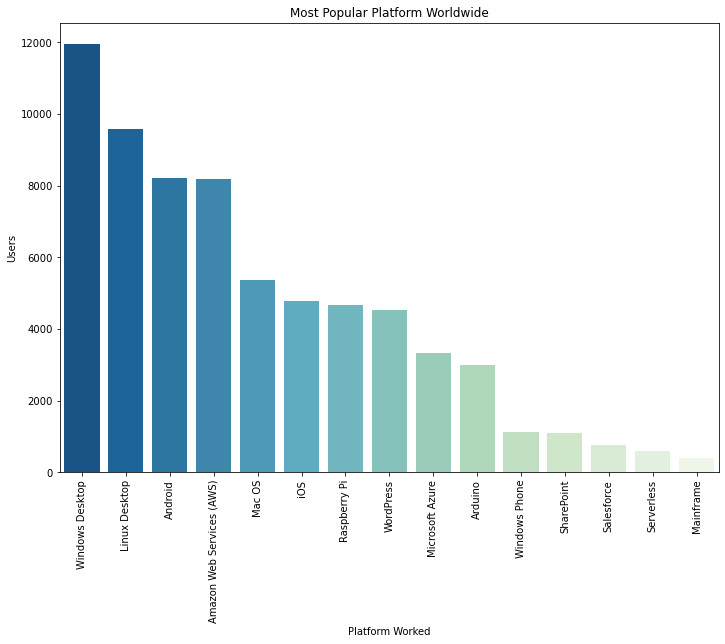

In [69]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D6,x='Platform Worked',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)
plt.title('Most Popular Platform Worldwide')
plt.show()

Windows 10 is the most popular windows OS with about 73.05 % market share. It has a wealth of tools and features etc.

hence, Windows Desktop is the most popular Platform to work for Mobile Developers.

# [WantWorkPlatform] Segregation,Cleaning and Analysis

In [70]:
dataT = data[data['WantWorkPlatform'].notna()]

In [71]:
A = {}
J = list()
for i in dataT['WantWorkPlatform']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [72]:
A

{'iOS': 7243,
 'Linux Desktop': 9330,
 'Raspberry Pi': 8033,
 'Amazon Web Services (AWS)': 10706,
 'Windows Desktop': 7678,
 'Mac OS': 5439,
 'Arduino': 4632,
 'Serverless': 1860,
 'Microsoft Azure': 4456,
 'Android': 11019,
 'Windows Phone': 1399,
 'WordPress': 2342,
 'Salesforce': 633,
 'Mainframe': 412,
 'SharePoint': 664}

In [73]:
D7 = pd.DataFrame.from_dict(A,orient='index')
D7 = D7.reset_index()
D7.columns=['Want Platform','Users']
D7.head(2)

,Want Platform,Users
0,iOS,7243
1,Linux Desktop,9330


In [74]:
D7=D7.sort_values(by='Users',ascending=False)

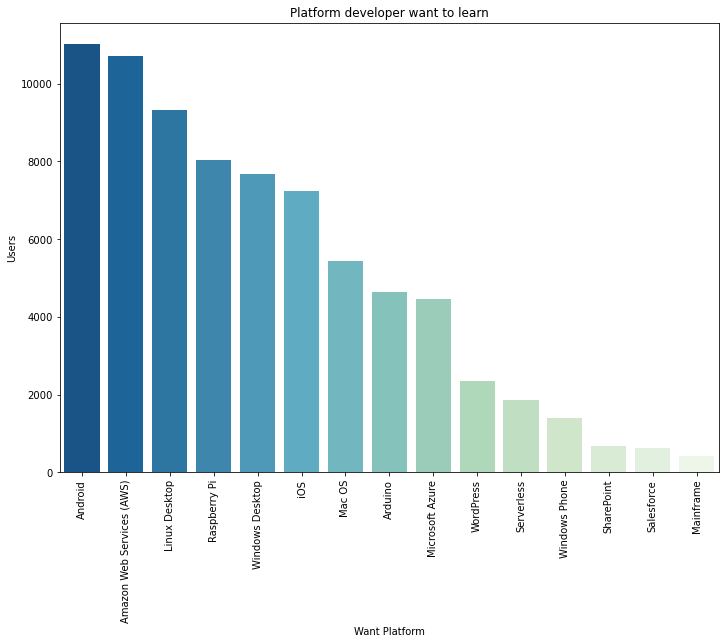

In [75]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D7,x='Want Platform',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)
plt.title('Platform developer want to learn')
plt.show()

Hence, we see that Android, AWS, Linux Desktop are amongst the top platforms that users want to learn

A large contributor to Android's popularity is the fact that many more smartphone and device manufacturers use it as the OS for their devices.

Since AWS's cost is modified based on the customers' usage, start-ups and small businesses can see the obvious benefits of using Amazon for their computing needs. In fact, AWS is great for building a business from the bottom as it provides all the tools necessary for companies to start up with the cloud.

What makes Linux attractive is the free and open source software (FOSS) licensing model. One of the most attractive elements offered by the OS is its price – totally free. Users can download current versions of hundreds of distributions.